In [93]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.spatial.distance import pdist
#from scipy.stats import poisson

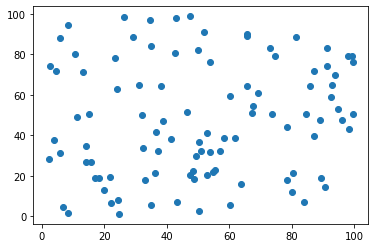

In [35]:
def gen_poisson(n: int):
    x_min, x_max = 0, 100
    y_min, y_max = 0, 100
    X = x_min + (x_max-x_min)*np.random.rand(n)
    Y = y_min + (y_max-y_min)*np.random.rand(n)
    plt.scatter(X,Y)
    
gen_poisson(100)

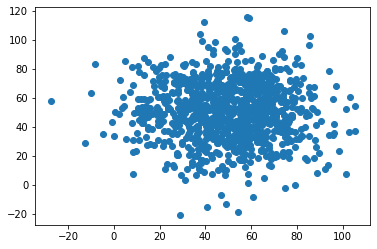

In [41]:
def gen_gauss(n: int):
    mu = [50,50]
    sigma = [20,20]
    
    X = mu[0] + sigma[0]*np.random.randn(n)
    Y = mu[1] + sigma[1]*np.random.randn(n)
    plt.scatter(X,Y)
    
gen_gauss(1000)

In [69]:
def neymar_scott(x_min, x_max, y_min, y_max, n_par, n_child, r_child):
    
    parents_X = x_min + (x_max-x_min)*np.random.rand(n_par)
    parents_Y = y_min + (y_max-y_min)*np.random.rand(n_par)
    
    children_X = []
    children_Y = []
        
    #plt.figure()
    
    for i in range(n_par):
        box_X = [parents_X[i]-(r_child/2), parents_X[i]+(r_child/2)]
        box_Y = [parents_Y[i]-(r_child/2), parents_Y[i]+(r_child/2)]
        
        for j in range(n_child):
            children_X.append( box_X[0] + (box_X[1]-box_X[0])*np.random.rand())
            children_Y.append( box_Y[0] + (box_Y[1]-box_Y[0])*np.random.rand())

    plt.scatter(children_X, children_Y)

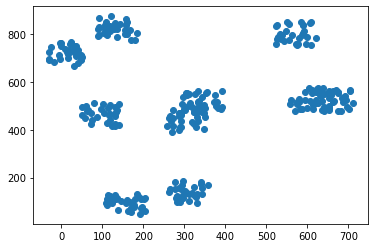

In [79]:
neymar_scott(0,1000, 0,1000, 10, 30, 100)

In [109]:
def single_energy(d):
    if (d>0 and d<=15):
        return 50
    elif (d>15 and d<=30):
        return -10
    else:
        return 0
    
def set_energy(points):
    all_combinations = list(itertools.combinations(points, 2))
    all_distances = [pdist(item) for item in all_combinations]
    all_energy = sum([single_energy(dist) for dist in all_distances])
    return all_energy

start energy:  9000
end energy  :  -2740
changed     :  157


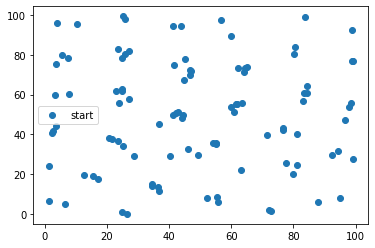

In [139]:
def gen_poisson2(n: int):
    x_min, x_max = 0, 100
    y_min, y_max = 0, 100
    X = x_min + (x_max-x_min)*np.random.rand(n)
    Y = y_min + (y_max-y_min)*np.random.rand(n)
    return X,Y

def gibbs(n : int, niter: int):
    X,Y = gen_poisson2(n)
    points = np.zeros((n,2))
    changed = 0
    
    for i in range(n):
        points[i] = np.array([X[i], Y[i]])
    main_energy = set_energy(points)
    starting_points = points.copy()
    starting_energy = main_energy
    for i in range(niter):
        change = False
        select_point = np.random.randint(n)
        point = points[select_point]
        x,y = point
        for i in range(5):
            new_point = gen_poisson2(1)
            x_new, y_new = float(new_point[0]), float(new_point[1])
            new_points = points.copy(); new_points[select_point] = np.array([x_new, y_new])
            if set_energy(new_points) < main_energy:
                main_energy = set_energy(new_points)
                points = new_points.copy()
                change = True
        
        if change : changed += 1
                
                
    print('start energy: ', starting_energy)
    print('end energy  : ', main_energy)
    print('changed     : ', changed)
    
    plt.figure()
    #plt.scatter(starting_points[:,0], starting_points[:,1])
    plt.scatter(points[:,0], points[:,1])
    plt.legend(["start","end"])
    
    
gibbs(100,1000)

In [ ]:
# Ripley
def ripley(X, Y, r):
    x_min, x_max = 0, 100
    y_min, y_max = 0, 100
    N = len(X)
    area = (x_max-x_min)*(y_max-y_min)
    lambd = N/area
    
    #K = (1/lambd)*(1/N)
    to_sum = 0
    for 